# Working with complicated dataset

Your name: Kyaw Soe Han

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [42]:
### Your code here . . .
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

col = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]
blast = pd.read_csv(url, comment="#", names= col, skiprows=6, usecols=col).drop(columns=["query acc.ver"]).set_index("subject acc.ver")
blast.head(5)

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


### Question 2
What is the average number of publications?

In [43]:
### Your code here . . .
blast['publications'] = pd.to_numeric(blast['publications'], errors='coerce')
blast.publications.mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [44]:
### Your code here . . .
blast['bonds'] = pd.to_numeric(blast['bonds'].str.replace(',', ''), errors='coerce')


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0
6G2J_H,100.000,317,0,0,2,318,2,318,0,626,100.00,15663,29.0
YP_002791042.1,99.057,318,3,0,1,318,1,318,0,625,99.69,15830,37.0
AGK29634.1,99.057,318,3,0,1,318,1,318,0,623,99.69,17381,14.0
0806162F,100.000,315,0,0,4,318,1,315,0,622,100.00,17499,43.0
YP_009112408.1,97.170,318,9,0,1,318,1,318,0,615,99.37,16861,46.0
YP_001876469.1,96.855,318,10,0,1,318,1,318,0,613,99.06,16274,22.0
YP_009092269.1,96.226,318,12,0,1,318,1,318,0,610,98.11,16170,47.0


In [48]:
blast[blast['bonds'] > 15000].index

Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

In [49]:
blast['% identity'] = pd.to_numeric(blast['% identity'], errors='coerce')
blast['% positives'] = pd.to_numeric(blast['% positives'], errors='coerce')

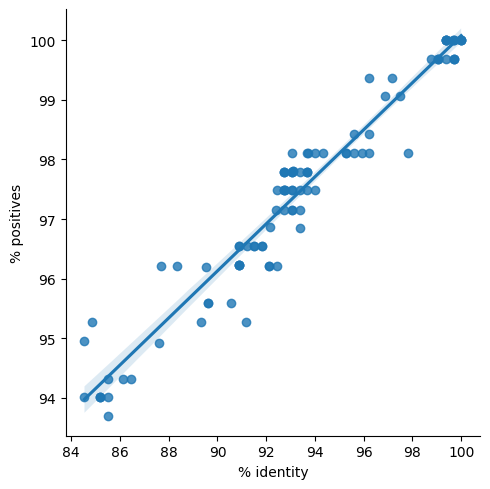

In [50]:
### Your code here . . .
sns.lmplot(
    data= blast,
    x = '% identity',
    y = '% positives'
)

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [55]:
### Your code here . . .
protein = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")
protein = protein.drop(columns=['Unnamed: 0'])
protein

,Protein,Source
0,NP_904328.1,RefSeq
1,YP_220563.1,GenPept
2,YP_002791042.1,GenPept
3,YP_001686698.1,GenPept
4,YP_009112408.1,GenPept
...,...,...
59,YP_009093743.1,GenPept
60,YP_665629.1,GenPept
61,YP_002381170.1,GenPept
62,YP_009414156.1,GenPept


In [56]:
merged = blast.merge(protein, left_on="subject acc.ver", right_on="Protein")
merged

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein,Source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,NP_904328.1,RefSeq
1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,YP_220563.1,GenPept
2,99.057,318,3,0,1,318,1,318,0,625,99.69,15830,37.0,YP_002791042.1,GenPept
3,99.371,318,2,0,1,318,1,318,0,625,100.00,6558,22.0,YP_001686698.1,GenPept
4,97.170,318,9,0,1,318,1,318,0,615,99.37,16861,46.0,YP_009112408.1,GenPept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,85.174,317,47,0,1,317,1,317,0,552,94.01,15876,5.0,YP_009093743.1,GenPept
60,93.060,317,22,0,1,317,1,317,0,552,98.11,6314,10.0,YP_665629.1,GenPept
61,93.060,317,22,0,1,317,1,317,0,551,97.79,7765,34.0,YP_002381170.1,GenPept
62,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,YP_009414156.1,GenPept
